In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('Downloads')

In [3]:
df = pd.read_csv('water_potability.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.shape

(3276, 10)

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
# ph value in water determines the acidic and alkaliine nature above 7 alkaline good for health 
# hardness in water caused by the dissolved salts i.e., calcium and magnesium range < 180 soft , > 180 hard
# solids in the drinking water has to be less than 300 i.e., total dossolved solids 
# chloramines. The mixture of chlorine and amonia in water for killing germs and has to be in range 2 to 4 
# sulfate in water has to be below 30 mg/l ...and permisssable limit is 200 mg/l
# Conductivity of water can be 200 to 800 
# organic_carbon generally lessthan 10mg/l 
# Trihalomethanes below 80 mg/l
# Turbidity below 10 looks good if  water above 10 mg/l water looks muddy and cloudy.


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
# Solids variable has to be divded by 100 as it gives us measurable magnitude value 
df['Solids'] = df['Solids'] / 100

In [10]:
# Can consider dataset to be balanced.
df['Potability'].value_counts()/len(df)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

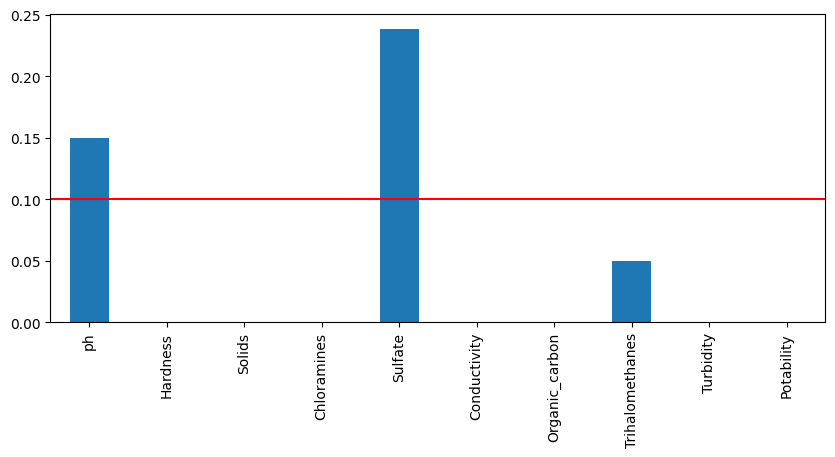

In [11]:
# find null values in the dataset.
plt.figure(figsize=(10,4))
df.isnull().mean().plot(kind = 'bar') 
plt.axhline(y = 0.10,color = 'r')

In [12]:
# find if any correlation of null values with Potability of water 
tmp = df.copy()
tmp['ph'] = np.where(df['ph'].isnull(),1,0)
print('The distribution of values to the labels\n',tmp['ph'].value_counts())
print('The distribution of values to the labels\n',tmp['Potability'].value_counts())

cross_tab = pd.crosstab(index = tmp['ph'] ,columns = tmp['Potability'],normalize = True)
cross_tab.index = ['ph_not_null','ph_is_null']
cross_tab.columns = ['not_potable','potable']

print('\n',cross_tab)
print("\nThere's only 5% of data that rests in water being 'potable' and null of 'ph'")

The distribution of values to the labels
 0    2785
1     491
Name: ph, dtype: int64
The distribution of values to the labels
 0    1998
1    1278
Name: Potability, dtype: int64

              not_potable   potable
ph_not_null     0.514042  0.336081
ph_is_null      0.095849  0.054029

There's only 5% of data that rests in water being 'potable' and null of 'ph'


In [13]:
#fill missing values with mean. 
df['Solids'] = df['Solids'].fillna(df['Solids'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [14]:
#Check is there any variation among the stats of variables when ph is null 
des1 = df.describe()
des2 = df[df['ph'].isnull()].describe()
for i in range(len(des1)):
    print(des1.iloc[:,i],des2.iloc[:,i],'\nthe null of ph\n\n')
    
print("""The above analysis indicates the ph values are randomly missing.
          Interpretation of missing nulls is not derived.""")

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ph, dtype: float64 
the null of ph


count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64 count    491.000000
mean     196.870284
std       32.560167
min       98.367915
25%      177.188016
50%      196.139312
75%      218.123578
max      287.370208
Name: Hardness, dtype: float64 
the null of ph


count    3276.000000
mean      220.140925
std        87.685708
min         3.209426
25%       156.666903
50%       209.278336
75%       273.327621
max       612.271960
Name: Solids, dtype: float64 count    491.000000
mean     222.584101
std       90.34

In [15]:
#Check is there any variation among the stats of variables when ph is null 
tmp = df.copy()
des1 = tmp.describe()
des2 = tmp[tmp['Sulfate'].isnull()]
for i in range(len(des1)):
    print(des1.iloc[:,i],des2.iloc[:,i],'\nthe null of Sulphate\n\n')

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64 Series([], Name: ph, dtype: float64) 
the null of Sulphate


count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64 Series([], Name: Hardness, dtype: float64) 
the null of Sulphate


count    3276.000000
mean      220.140925
std        87.685708
min         3.209426
25%       156.666903
50%       209.278336
75%       273.327621
max       612.271960
Name: Solids, dtype: float64 Series([], Name: Solids, dtype: float64) 
the null of Sulphate


count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64 Series([], Name:

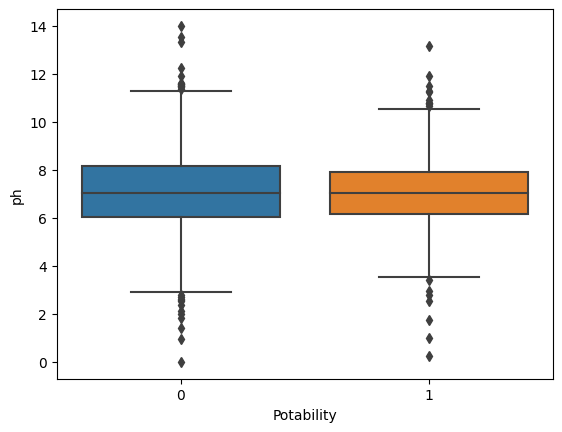

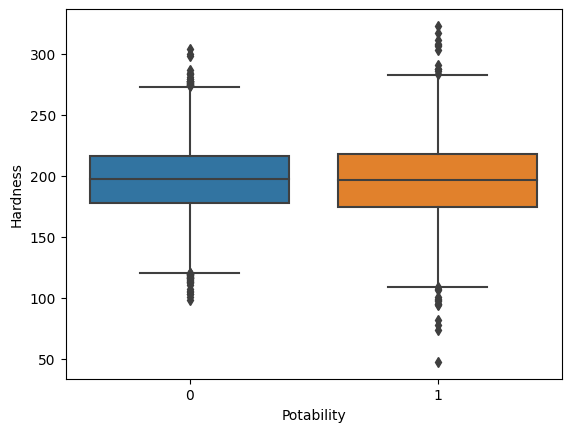

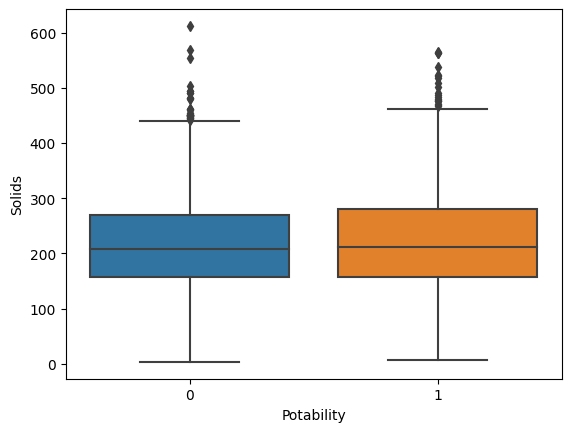

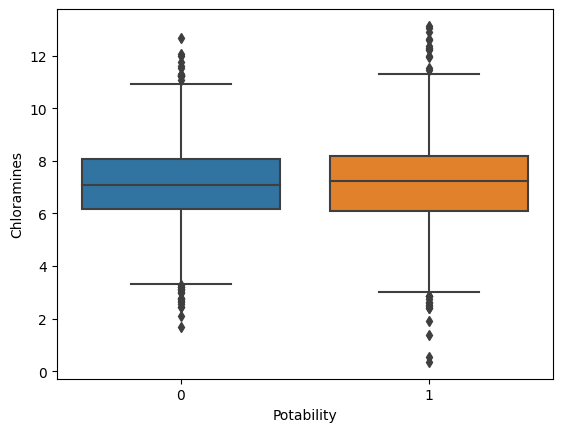

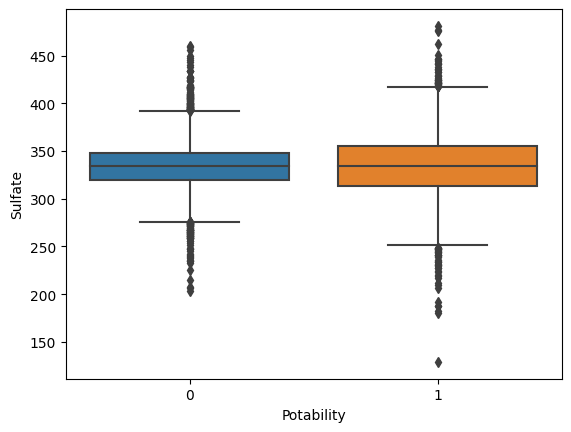

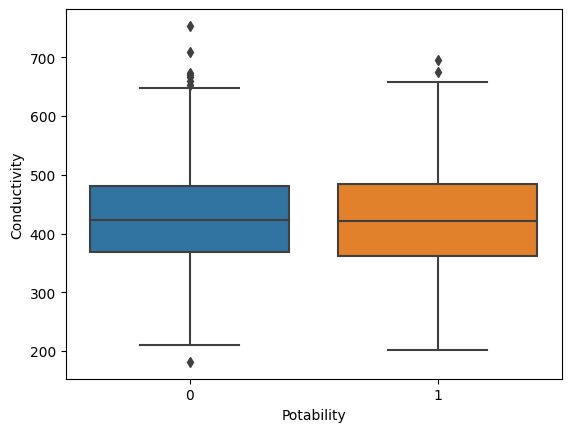

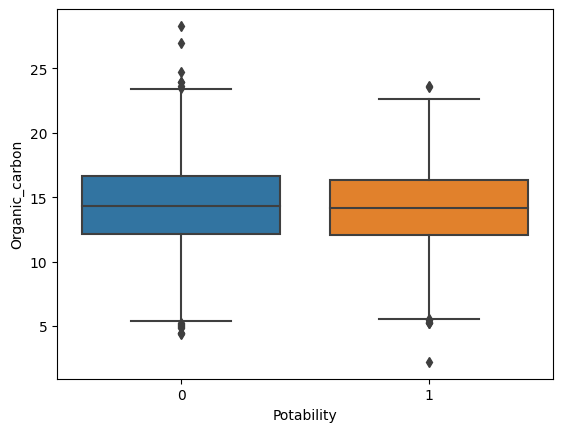

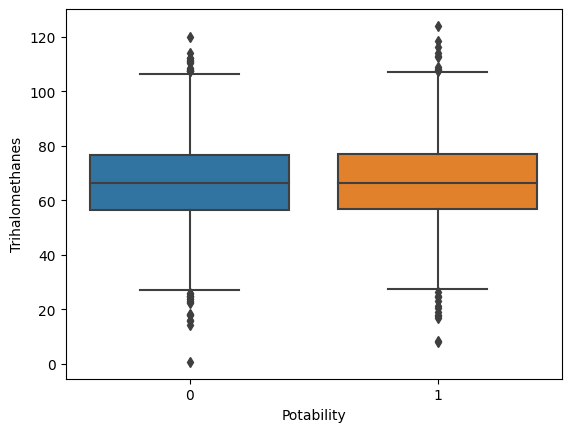

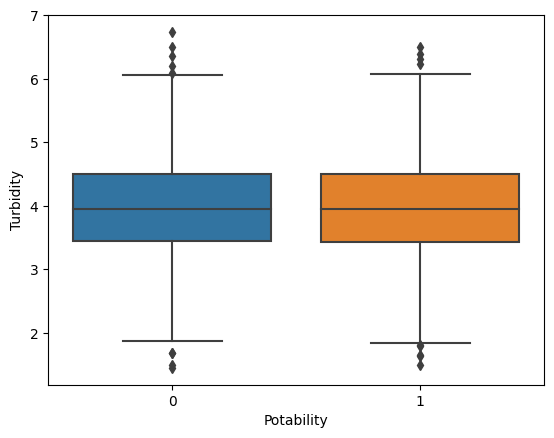

In [16]:
#outlier detection of every variable with the target column 
for col in df.columns:
    if col not in 'Potability':
        sns.boxplot(x = df['Potability'], y = df[col])
        plt.xlabel('Potability')
        plt.ylabel(col)
        plt.show()

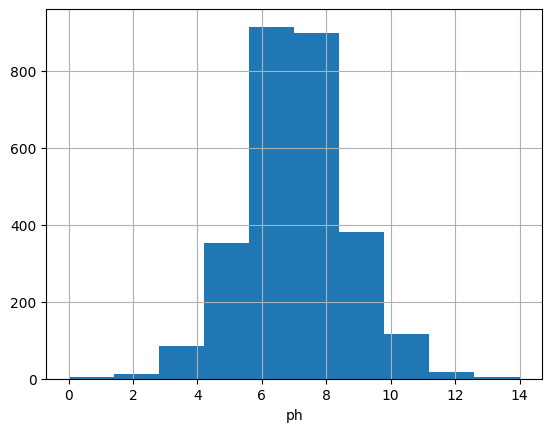

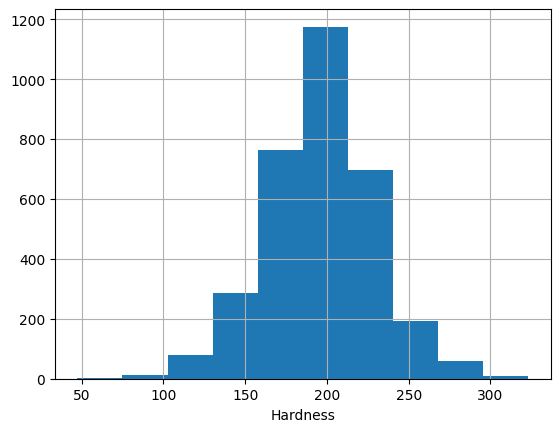

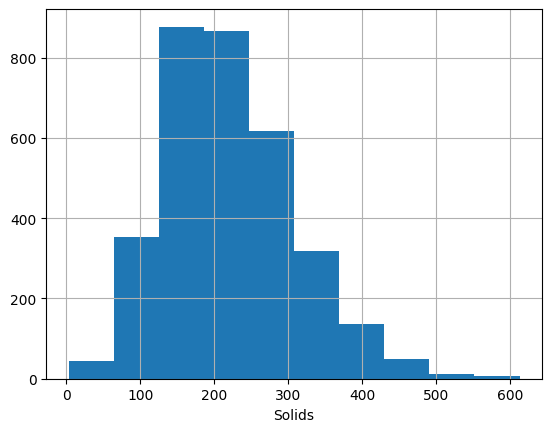

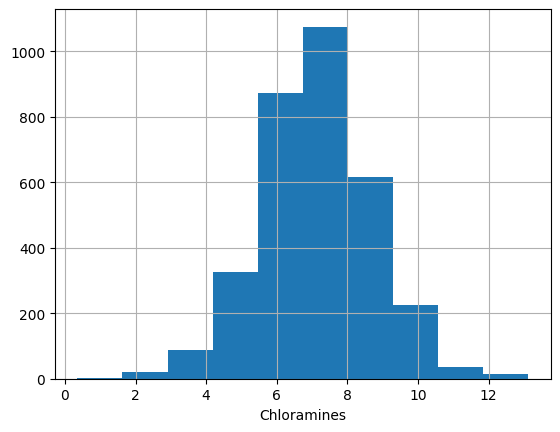

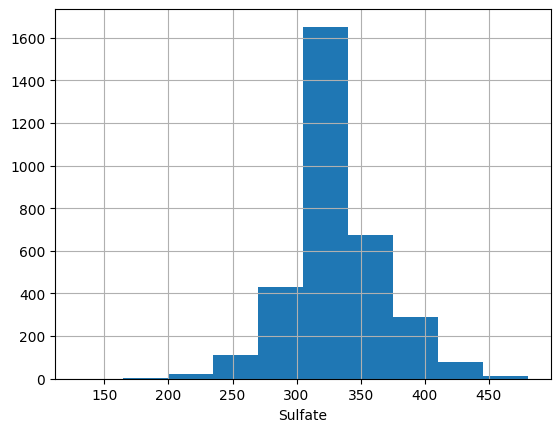

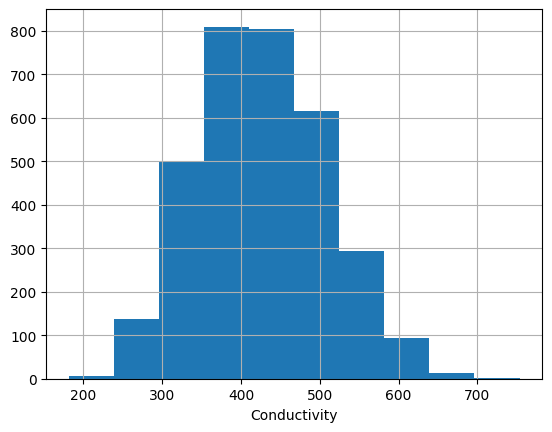

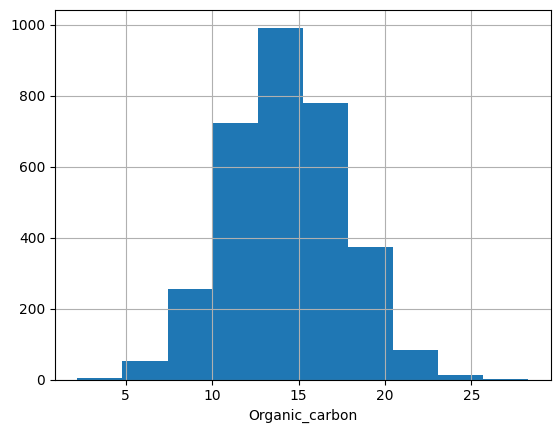

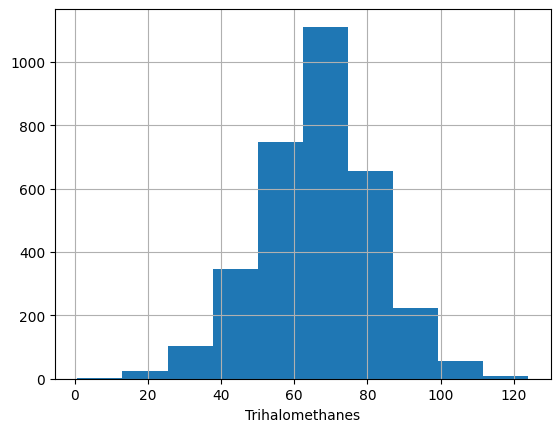

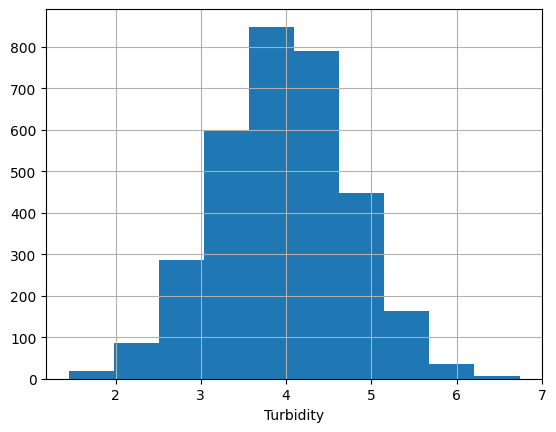

In [17]:
#check the distribution of the data
for col in df.columns:
    if col not in 'Potability':
        df[col].hist()
        plt.xlabel(col)
        plt.show()

<AxesSubplot: xlabel='Potability', ylabel='count'>

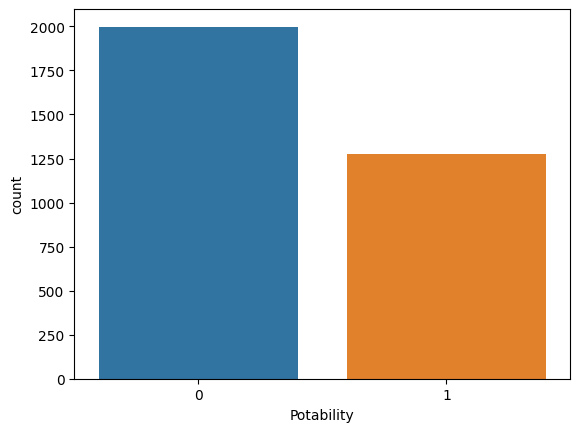

In [18]:
sns.countplot(x = df['Potability'])

<AxesSubplot: ylabel='Density'>

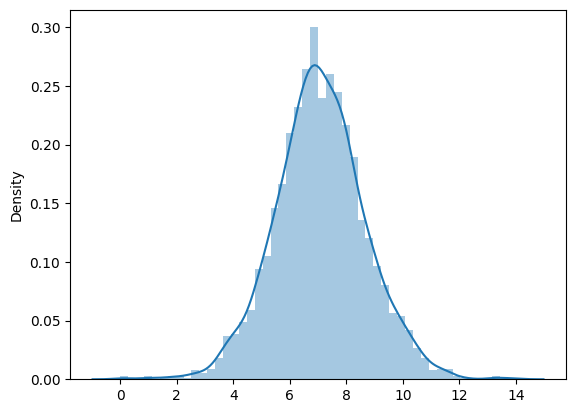

In [19]:
# Distribution of ph values 
sns.distplot(x = df['ph'],hist = True)

In [20]:
mu = df['ph'].mean()
sigma = df['ph'].std()

In [21]:
# What is the probability of ph value of water 7 and above  
# As the data is normally distributed we use normal dist function.
value = 1 -  stats.norm.cdf(x =7,loc = mu,scale = sigma)
print(f"The probability of ph value 7 and above: {value}")
value1 = stats.norm.cdf(x = 6,loc = mu,scale = sigma)
print(f"The probability of ph value below 6 : {value1}")

The probability of ph value 7 and above: 0.5202083413631124
The probability of ph value below 6 : 0.2489164955413946


The probability of values greater than 50% is 0.45603910228937505


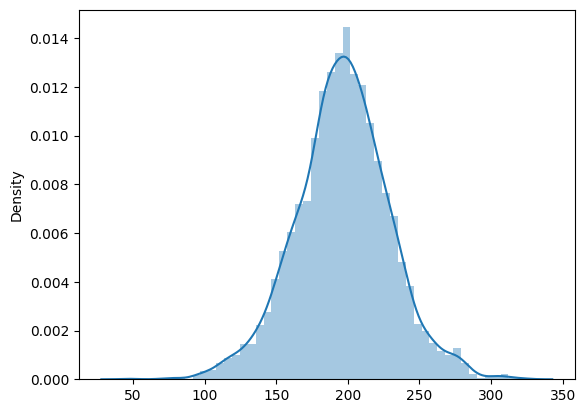

In [22]:
# hardness in water caused by the dissolved salts i.e., calcium and magnesium range < 180 soft , > 180 hard
sns.distplot(x = df['Hardness'])
Hardness_probability = 1 - stats.norm.cdf(x = 200,loc = df['Hardness'].mean(),scale = df['Hardness'].std())
print(f"The probability of values greater than 50% is {Hardness_probability}")

The probability of drinkable turbidity value below 10 : 0.9999999999999947


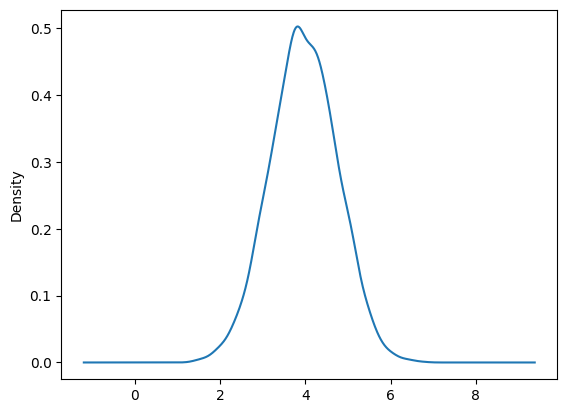

In [23]:
# Turbidity below 10 looks good if  water above 10 mg/l water looks muddy and cloudy.
df['Turbidity'].plot(kind = 'density')
turbidity_probability = stats.norm.cdf(x = 10,loc = df['Turbidity'].mean(),scale = df['Turbidity'].std())
print(f"The probability of drinkable turbidity value below 10 : {turbidity_probability}")

The probability of drinking water as the range states between 150 and 300: 0.606903743295812


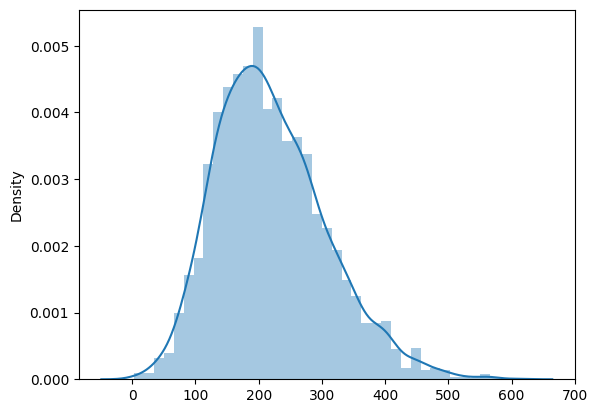

In [24]:
# Solids (TDS) of water the drinkable range is between 150 to 300.
sns.distplot(x = df['Solids'])
solids_probability = stats.norm.cdf(x = 300,loc = df['Solids'].mean(),scale = df['Solids'].std()) - stats.norm.cdf(x = 150,loc = df['Solids'].mean(),scale = df['Solids'].std())
print(f"The probability of drinking water as the range states between 150 and 300: {solids_probability}")